# MI2 - 10: Self Organizing Maps
## The chantastic 4: Elisabeth Kress, Paola Suárez, Jianmeng Wu and Esra Zihni

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.pairwise import euclidean_distances
%matplotlib inline

## 10.1.  1d Self-Organizing Map for 2d data

### a) Generating data points

In [26]:
d = 2
p = 1000
low = [0,0]
high = [2,1]
x = np.random.uniform(low, high, size=(p,d))

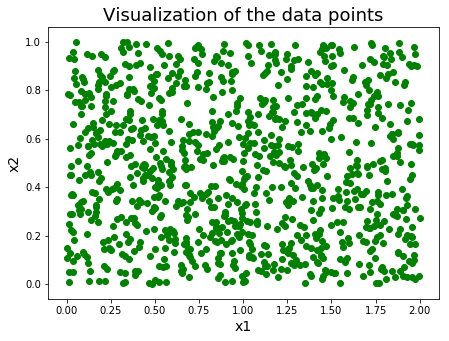

In [27]:
plt.figure(figsize= (7,5))
plt.scatter(x[:,0],x[:,1],c= 'g')
plt.title('Visualization of the data points', size=18)
plt.xlabel('x1', size=14)
plt.ylabel('x2', size=14)
plt.show()

### b) Gaussian neighbourhood function

In [28]:
def h_function(q, p, sigma):
    return np.exp(-((q-p)**2)/(2*(sigma**2)))

### c) Implementing 1d self organizing map

In [29]:
Ks = [4,8,16,32,64,128]
final_ws =[]
for K in Ks:
    w= np.zeros((K, 2))
    w[:,0] = np.random.normal(loc=x[:,0].mean(), size = K)
    w[:,1] = np.random.normal(loc=x[:,1].mean(), size = K)
    epsilon = 0.005
    sigma = 5
    while sigma > 0.1:
        p= np.argmin(euclidean_distances(x, w),axis=1)
        for j in range(K):
            w[j,:] += epsilon*np.dot(h_function(p, j, sigma),(x-w[j,:])) 
        sigma *= 0.95
        epsilon *= 0.9
    final_ws.append(w)

### d) Plotting

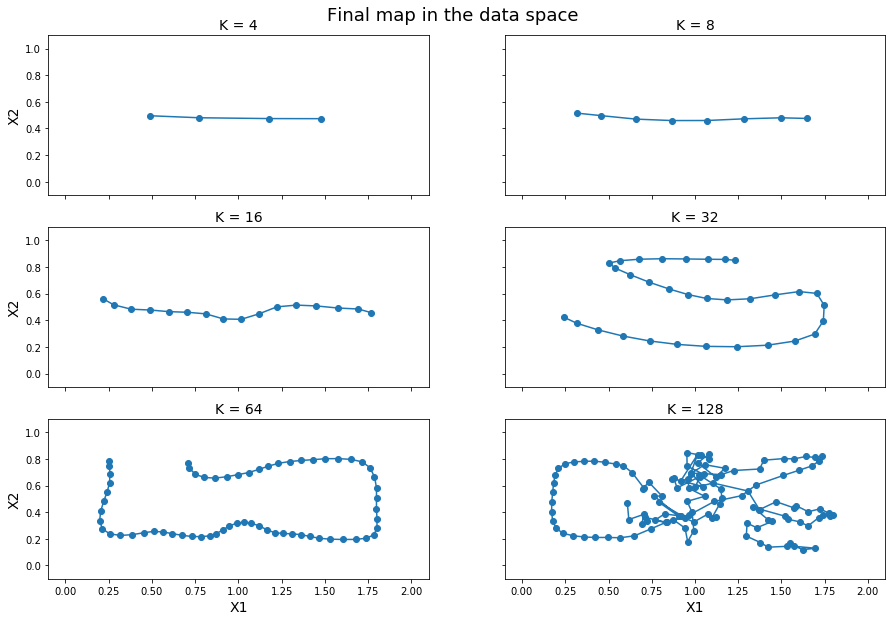

In [31]:
# Plot the protoypes and their connections
fig, ax = plt.subplots(3,2, sharex=True, sharey=True, figsize= (15,10))
ax = ax.ravel()
for i,K in enumerate(Ks):
    #ax[i].scatter(x[:,0],x[:,1],c= 'g',alpha=0.3)
    ax[i].plot(final_ws[i][:,0],final_ws[i][:,1], 'o-')
    ax[i].set_title('K = %i'%(K), size=14)
    ax[i].set_xlim(-0.1,2.1)
    ax[i].set_ylim(-0.1,1.1)
    if i%2 == 0:
        ax[i].set_ylabel("X2", size=14)
ax[4].set_xlabel("X1", size=14)
ax[5].set_xlabel("X1", size=14)
plt.suptitle('Final map in the data space', size=18, y=0.92)
plt.show()

## 10.2.  1d Self-Organizing Maps for 3d data

### a) Visualization of dataset

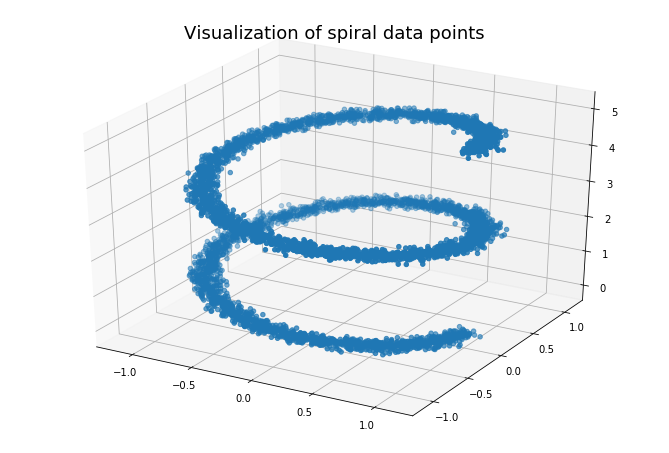

In [33]:
x = np.genfromtxt('spiral.csv', delimiter=',',skip_header=1,usecols=(1,2,3))

fig = plt.figure(figsize=(9,6))
ax = Axes3D(fig)
ax.scatter(x[:,0],x[:,1], x[:,2], depthshade=True)
plt.title('Visualization of spiral data points', size=18)
plt.show()

### b) Adapted h_function

In [34]:
x[:,0].mean()

0.00067780916693531022

### c) Implementing 1d self organizing map

In [35]:
Ks = [16,32,64,128]
final_ws =[]
for K in Ks:
    w= np.zeros((K, 3))
    #w[:,0] = np.random.normal(loc=x[:,0].mean(), size = K)
    #w[:,1] = np.random.normal(loc=x[:,1].mean(), size = K)
    w[:,2] = np.random.uniform(low=0, high=K+1, size =K)
    epsilon = 0.005
    sigma = 5
    while sigma > 0.1:
        p= np.argmin(euclidean_distances(x, w),axis=1)
        for j in range(K):
            w[j,:] += epsilon*np.dot(h_function(p, j, sigma),(x-w[j,:])) 
        sigma *= 0.95
        epsilon *= 0.9
    final_ws.append(w)

###  d) Plotting

In [23]:
AxesSubplot?

Object `AxesSubplot` not found.


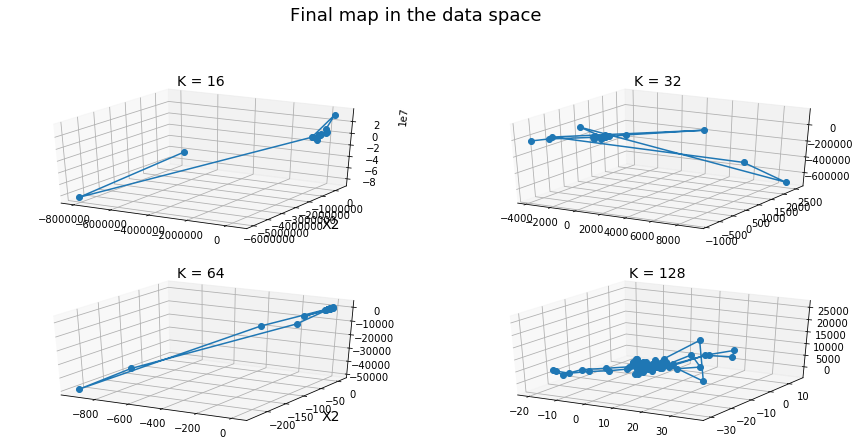

In [46]:
fig = plt.figure(figsize=(15,10))

for i,K in enumerate(Ks):
    ax = fig.add_subplot(3,2,i+1, projection='3d')
    ax.scatter(x[:,0],x[:,1], x[:,2], depthshade=True)
    ax.plot(final_ws[i][:,0],final_ws[i][:,1],final_ws[i][:,2], 'o-')
    ax.set_title('K = %i'%(K), size=14)
    if i%2 == 0:
        ax.set_ylabel("X2", size=14)
    
#ax[4].set_xlabel("X1", size=14)
#ax[5].set_xlabel("X1", size=14)
plt.suptitle('Final map in the data space', size=18)
plt.show()

## 10.3.  2d Self-Organizing Maps for 3d data

### a) Visualization of dataset

In [ ]:
data2 = np.genfromtxt('bowl.csv', delimiter=',',skip_header=1,usecols=(1,2,3))

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data2[:,0],data2[:,1], data2[:,2], depthshade=True)
plt.title('Visualization of bowl data points')
plt.show()